In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [15]:
df = pd.read_csv("NetflixOriginals.csv", encoding = "ISO-8859-1")
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


1. Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.


In [4]:
full_length_films = df[df.Runtime > 40]  # 40 dakikadan uzun filmler uzun metraj sayılmaktadır.

In [5]:
languages = full_length_films["Language"].value_counts()
languages_index = languages.index
languages_values = languages.values

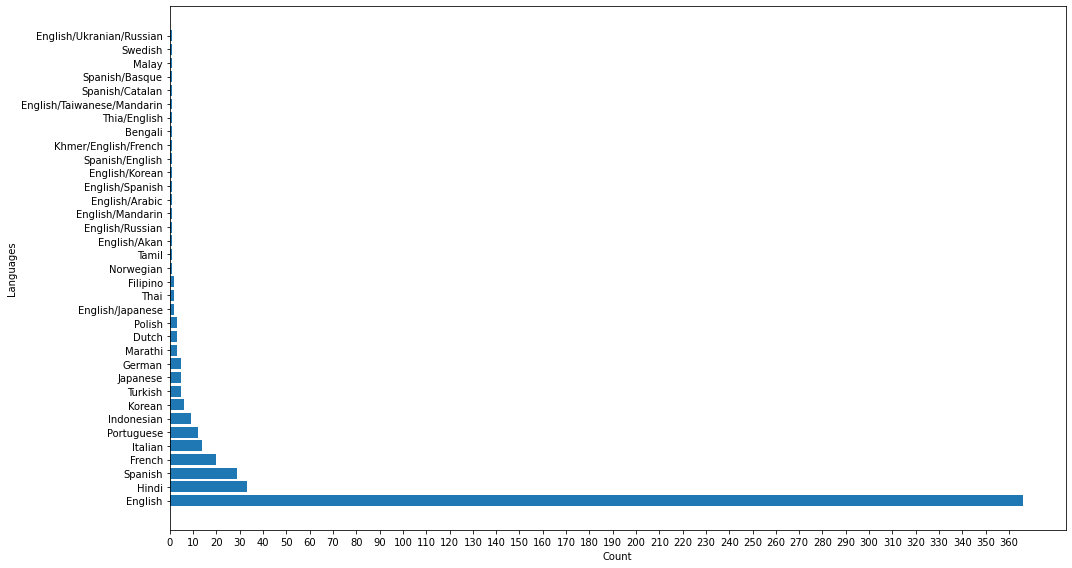

In [ ]:
plt.figure(figsize=(15, 8))

plt.xlabel("Count")
plt.ylabel("Languages")

plt.xticks(np.arange(0, np.max(languages_values), 10))

plt.barh(languages_index, languages_values)
plt.tight_layout()

plt.show()

2. 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.


In [16]:
df["date"] = pd.DatetimeIndex(df.Premiere)
doc_btw_2019_2020 = df[(df.Genre == "Documentary") & (df.date >= "2019-01-01") & (df.date < "2020-06-01")]["IMDB Score"]

In [7]:
doc_btw_2019_2020_index = df.iloc[doc_btw_2019_2020.index, 0].values
doc_btw_2019_2020_values = doc_btw_2019_2020.values

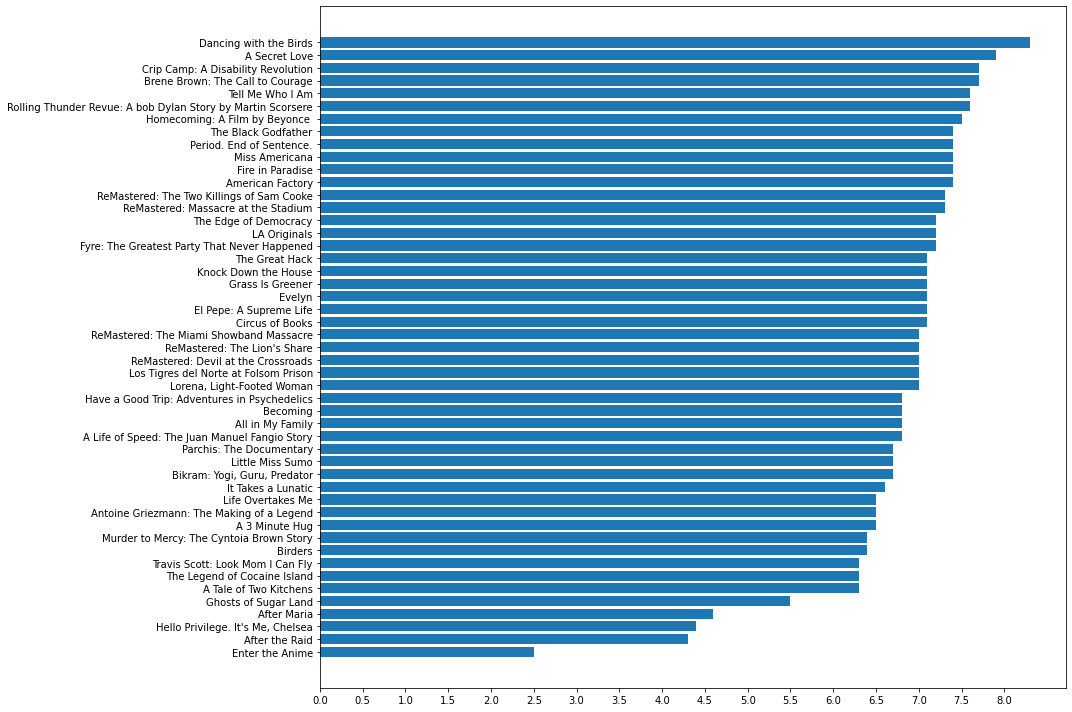

In [ ]:
plt.figure(figsize=(15, 10))

plt.xticks(np.arange(0, np.max(doc_btw_2019_2020_values), 0.5))

plt.barh(doc_btw_2019_2020_index, doc_btw_2019_2020_values)
plt.tight_layout()
plt.show()

3. İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [8]:

df[df["Language"].str.contains('English')] #Ingilizcenin de oldugu
df[df["Language"]=='English'] #Sadece ingilizce olanlar (Sadece ingilizce olanlari kullandim bu soru icin)
df_new = df[df["Language"]=='English'].groupby("Genre")["IMDB Score"].max() #Ture gore gruplandi
df_new[df_new==df_new.max()].index[0] 

print("Tür:",df_new[df_new==df_new.max()].index[0],"\nIMDB puanı:",df_new.max())


Tür: Documentary 
IMDB puanı: 9.0


4. 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [ ]:
df[df["Language"].str.contains('Hindi')] #Hindi dilinin de oldugu
time = df[df["Language"].str.contains('Hindi')]["Runtime"].mean()

print(f"'Hindi' dilinde çekilmiş olan filmlerim ortalama 'runtime' süresi {time:.2f} dakikadır")

'Hindi' dilinde çekilmiş olan filmlerim ortalama 'runtime' süresi 111.03 dakikadır


5. 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.


In [ ]:
df["Genre"].value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

In [ ]:
df["Genre"].nunique()

115

Genre sütununda 115 tane kategori vardır bu kategoriler : Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64


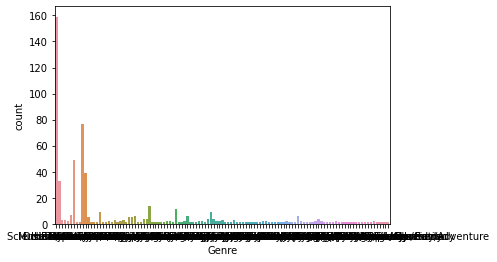

In [ ]:
def count_plot(dataframe, col, plot=False):
  how_many = df[col].nunique()
  cat = df[col].value_counts()
  print(f"{col} sütununda {how_many} tane kategori vardır bu kategoriler : {cat}")
  if plot:
    sns.countplot(x=dataframe[col], data=dataframe)
    plt.show(block=True)


count_plot(df,"Genre", plot=True)


6. Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.


In [17]:
#Birden fazla dil içeren filmleri ayırdım
df_l = df.set_index(['Title', 'Genre','Premiere','Runtime','IMDB Score','date']).apply(lambda x: x.str.split('/').explode()).reset_index()

print("Veri setinde bulunan filmlerde en çok kullanılan 3 dil:")
df_l["Language"].value_counts().head(3)

Veri setinde bulunan filmlerde en çok kullanılan 3 dil:


English    422
Spanish     39
Hindi       35
Name: Language, dtype: int64

7. IMDB puanı en yüksek olan ilk 10 film hangileridir?




In [ ]:
df.nlargest(10, ['IMDB Score'])

,Title,Genre,Premiere,Runtime,IMDB Score,Language,date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,2020-05-20
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English,2017-11-24
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,2019-10-23
571,13th,Documentary,"October 7, 2016",100,8.2,English,2016-10-07
572,Disclosure: Trans Lives on Screen,Documentary,"June 19, 2020",107,8.2,English,2020-06-19


8. IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

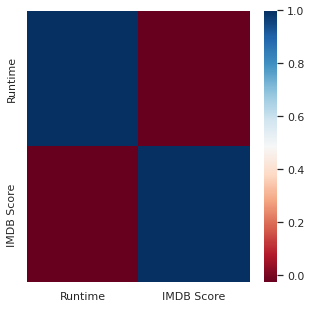

Sayısal Değişkenler : ['Runtime', 'IMDB Score'] ve
 korelasyon matrixi 
              Runtime  IMDB Score
Runtime     1.000000   -0.027736
IMDB Score -0.027736    1.000000 
 şeklindedir. Bu değişkenler arasında negatif yönde düşük kuvvetli doğrusal bir ilişki vardır


In [ ]:
def korelasyon(dataframe, plot=False):
  num_col = [col for col in df.columns if df[col].dtype in [int,float]] #sadece saysal değişkenleri al
  corr = df[num_col].corr() 
  if plot:
    sns.set(rc={'figure.figsize':(5,5)}) #heatmap yapımı
    sns.heatmap(corr, cmap="RdBu")
    plt.show()
  print(f"Sayısal Değişkenler : {num_col} ve\n korelasyon matrixi \n {corr} \n şeklindedir. Bu değişkenler arasında negatif yönde düşük kuvvetli doğrusal bir ilişki vardır")  

korelasyon(df, plot=True)  


9. IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

In [ ]:
sort_by_imdb = df.sort_values(by='IMDB Score', ascending=False)
top_ten_genre = sort_by_imdb['Genre'].unique()[:10]
top_ten_genre_index = [583, 581, 579, 573, 565, 561, 560, 552, 553, 558]
imdb = df.iloc[top_ten_genre_index,4]

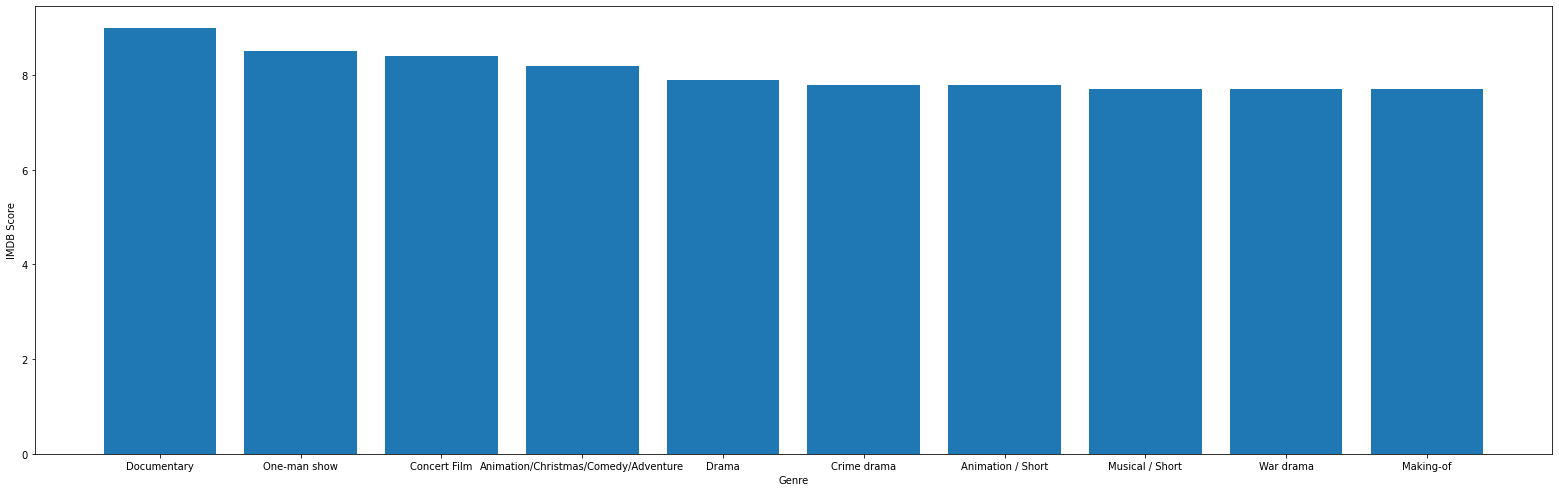

In [21]:
plt.figure(figsize=(22, 7))

plt.xlabel("Genre")
plt.ylabel("IMDB Score")
plt.tight_layout()
plt.bar(top_ten_genre, imdb)
plt.show()

10. 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

In [28]:
sort_by_runtime = df.sort_values(by="Runtime", ascending=False)
highest_runtime = sort_by_runtime.Runtime[:10].values
highest_runtime_names = sort_by_runtime.Title[:10].values

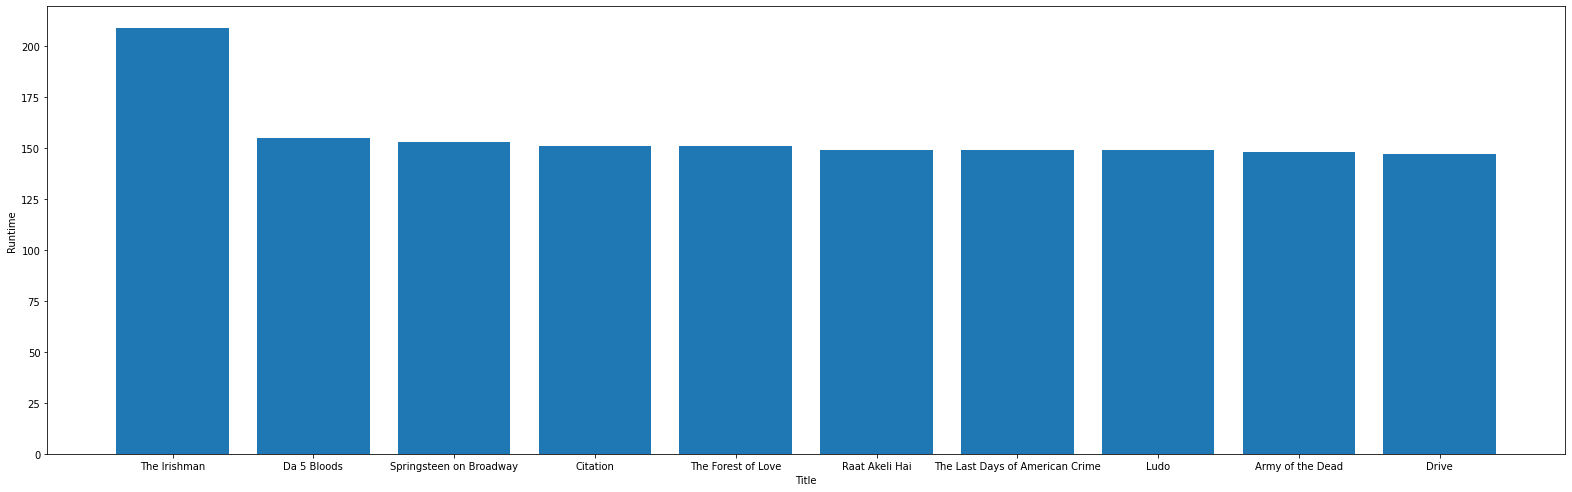

In [29]:
plt.figure(figsize=(22, 7))

plt.xlabel("Title")
plt.ylabel("Runtime")
plt.tight_layout()
plt.bar(highest_runtime_names, highest_runtime)
plt.show()

11. Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

In [35]:
year = pd.DatetimeIndex(df.Premiere).year
year_index = sorted(year.value_counts().index)
year = pd.DataFrame(year)
year_values = year.value_counts().sort_index().values
year_values

array([  1,   9,  30,  66,  99, 125, 183,  71])

<BarContainer object of 8 artists>

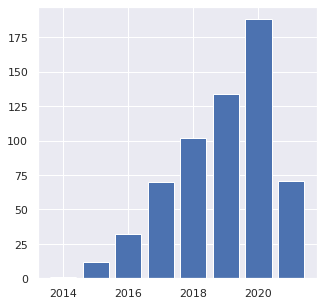

In [ ]:
plt.bar(year_index, year_values)

12. Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

Buna göre 'Malayca' dilinde yayımlanan filmlerin en düşük ortalama IMDB puanına sahip olduğunu söyleyebiliriz



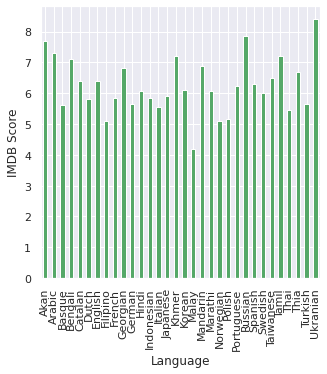

In [ ]:
df.groupby("Language")["IMDB Score"].mean() #Dillere göre gruplayıp her bil dil için yayımlanan filmlerin ortalama IMDB puanı hesaplanıldı.
(df.groupby("Language")["IMDB Score"].mean()).plot(kind='bar',color='g') #Bar grafiği ile görselleştirildi.
plt.xlabel("Language") 
plt.ylabel("IMDB Score")

print("Buna göre 'Malayca' dilinde yayımlanan filmlerin en düşük ortalama IMDB puanına sahip olduğunu söyleyebiliriz\n")

13. Hangi yılın toplam "runtime" süresi en fazladır?

In [ ]:
splitted_premiere = [elm.replace(',',' ').replace('.',' ').split()[2] for elm in df["Premiere"]] 
#Her bir Premiere değeri ['August','5','2019'] biçiminde olacak şekilde split edildi.

grouped_years = df.groupby(splitted_premiere)["Runtime"].sum()
#Elde ettiğimiz çıktıya göre '2020' yılının toplam 'runtime' süresi en fazladır.
"""
2014       81
2015      814
2016     2766
2017     6129
2018     9405
2019    10856
2020    17384
2021     7214
Name: Runtime, dtype: int64
"""
max_runtime = df.groupby(splitted_premiere)["Runtime"].sum().max()
#max fonksiyonu ile maksimum toplam runtime değerine sahip değer max_runtime değişkeni içinde tutuldu.
print(f"Elde ettiğimiz çıktıya göre {grouped_years[grouped_years==max_runtime].index[0]} yılının toplam 'runtime' süresi en fazladır")



Elde ettiğimiz çıktıya göre 2020 yılının toplam 'runtime' süresi en fazladır


14. Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [ ]:
#Birden fazla dil içeren filmleri ayırdım
df_new = df.set_index(['Title', 'Genre','Premiere','Runtime','IMDB Score','date']).apply(lambda x: x.str.split('/').explode()).reset_index()

#Dil ve türe göre kategorize ettim
df_new2 = pd.DataFrame(df_new.groupby(["Language","Genre"])["Premiere"].count()).reset_index()

#Her bir dil için en fazla kullanılan genreyi buldum
df_new2.groupby("Language").max()



,Genre,Premiere
Language,,
Akan,War drama,1
Arabic,Documentary,1
Basque,Black comedy,1
Bengali,Documentary,1
Catalan,Documentary,1
Dutch,Romantic comedy,1
English,Zombie/Heist,136
Filipino,Thriller,1
French,Thriller,6


15. Veri setinde outlier veri var mıdır? Açıklayınız.

In [36]:
num = df.select_dtypes(include = ['float64' , 'int64'])
num

,Runtime,IMDB Score
0,58,2.5
1,81,2.6
2,79,2.6
3,94,3.2
4,90,3.4
...,...,...
579,125,8.4
580,91,8.4
581,153,8.5
582,89,8.6


In [37]:
def outlier_val(dataframe , col):
  sec = df[col]
  sns.boxplot(x = sec)
  Q1 = sec.quantile(0.25)
  Q3 = sec.quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  outliers = ((sec) < (lower)) | ((sec) > (upper))
  out = [col for col in outliers if col == True]
  values = sec[outliers] 
  lenght = len(out)
  print(f"Aykırı değerlerimiz \n {values}\n şeklinde listelenmiştir ,\n Aykırı değer sayısı : {lenght}  ")


Aykırı değerlerimiz 
 5      147
7      149
15      25
16     144
30      37
      ... 
552     15
560     12
561    209
577     51
581    153
Name: Runtime, Length: 75, dtype: int64
 şeklinde listelenmiştir ,
 Aykırı değer sayısı : 75  


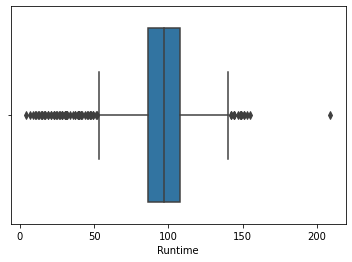

In [38]:
outlier_val(df,'Runtime')  

Aykırı değerlerimiz 
 0      2.5
1      2.6
2      2.6
3      3.2
4      3.4
5      3.5
6      3.7
7      3.7
583    9.0
Name: IMDB Score, dtype: float64
 şeklinde listelenmiştir ,
 Aykırı değer sayısı : 9  


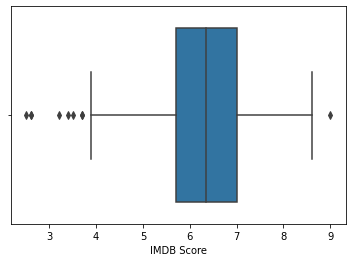

In [39]:
outlier_val(df,'IMDB Score') 